In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import tqdm

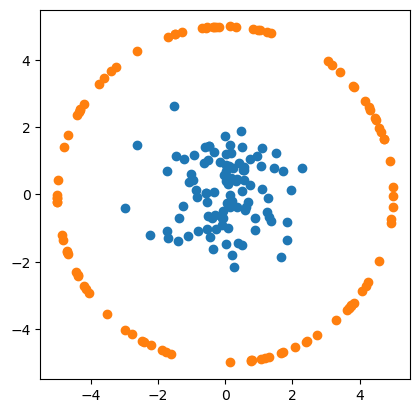

In [35]:
x_inside = torch.randn((100, 2))
angles = (2 * torch.rand((100, 1))) * torch.pi
x_outside = torch.cat([torch.sin(angles), torch.cos(angles)],
                      dim=1) * 5

fig, ax = plt.subplots(1, 1)
ax.scatter(x_inside[:, 0], x_inside[:, 1])
ax.scatter(x_outside[:, 0], x_outside[:, 1])
ax.set_aspect('equal')
plt.show()

# Problem definition
Given the above dataset, create a neural network classifier that classify the
dataset. Visualize the classification result, the loss function during training.
Show the results for 3 different optimizer: SGD, SGD + Momentum, and Adam.

In [36]:
def train_model(model, optimizer, x, y, epochs):
    criterion = nn.CrossEntropyLoss()
    losses = []

    for epoch in tqdm.trange(epochs): 
        y_pred = model(x)
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    return losses

In [37]:
def visualize(model, x, y, ax):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

    with torch.no_grad():
        z = model(grid).argmax(dim=1).reshape(xx.shape)

    ax.contourf(xx, yy, z, alpha=0.5, cmap=plt.cm.RdYlBu)
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')

In [38]:
x = torch.cat([x_inside, x_outside])
y = torch.cat([torch.zeros(100), torch.ones(100)]).long()

In [39]:
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),         
    nn.Linear(16, 16),
    nn.ReLU(),         
    nn.Linear(16, 2)
)

In [40]:
epochs = 100
lr = 0.01
momentum = 0.9

optimizers = {
    'SGD': lambda model: optim.SGD(model.parameters(), lr=lr),
    'SGD + Momentum': lambda model: optim.SGD(model.parameters(), lr=lr, momentum=momentum),
    'Adam': lambda model: optim.Adam(model.parameters(), lr=lr)
}

100%|██████████| 100/100 [00:00<00:00, 987.90it/s]


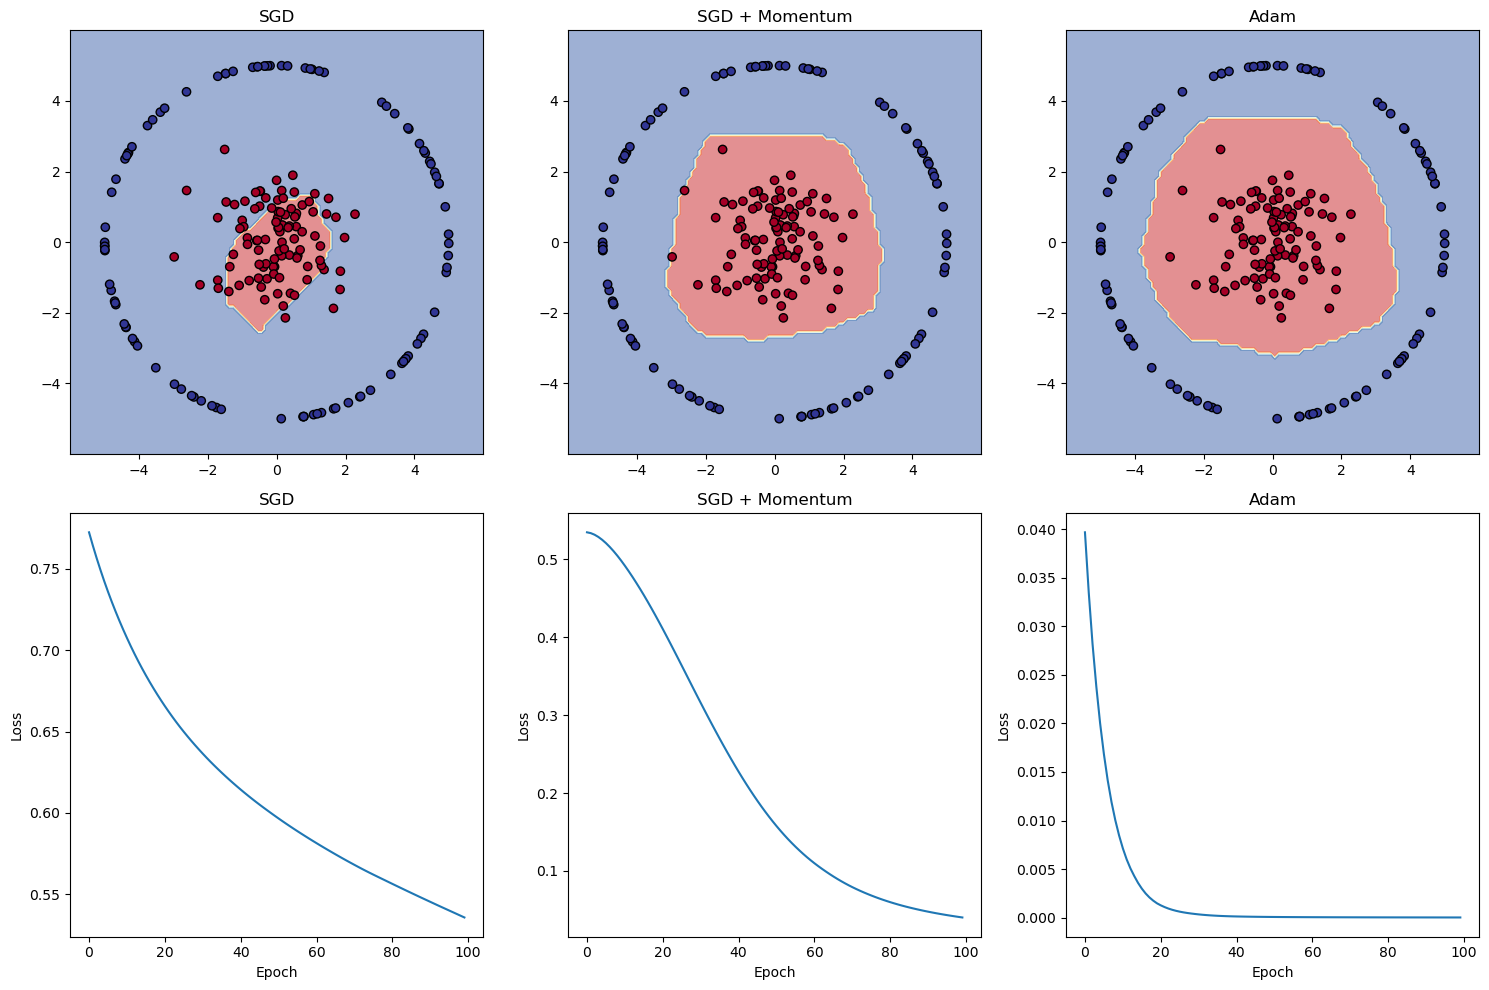

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (name, opt_fn) in enumerate(optimizers.items()):
    optimizer = opt_fn(model)
    losses = train_model(model=model, optimizer=optimizer, x=x, y=y, epochs=epochs)

    visualize(model, x, y, axs[0, i])
    axs[0, i].set_title(name)

    axs[1, i].plot(losses)
    axs[1, i].set_title(name)
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Loss')

plt.tight_layout()
plt.show()